In [1]:
import pandas as pd

import pandas_datareader as pdr
#helps in remotely accessing data from sites

import matplotlib.pyplot as plt

# Data Collection
Importing stock data from Tiingo, which is supported by pandas_datareader
stock price for aaple- AAPL

In [2]:
df= pdr.get_data_tiingo('TSLA', api_key="77f2b1c33ecff205fd3489be2a3b5d3ad9595913"
)

In [3]:
df.to_csv('TSLA.csv')

In [4]:
df= pd.read_csv('TSLA.csv')
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-02-28 00:00:00+00:00,249.99,251.00,243.90,244.19,6078145,49.998,50.200,48.780,48.838,30390725,0.0,1.0
1,TSLA,2017-03-01 00:00:00+00:00,250.02,254.85,249.11,254.18,4809488,50.004,50.970,49.822,50.836,24047440,0.0,1.0
2,TSLA,2017-03-02 00:00:00+00:00,250.48,253.28,248.27,249.71,3351833,50.096,50.656,49.654,49.942,16759165,0.0,1.0
3,TSLA,2017-03-03 00:00:00+00:00,251.57,251.90,249.00,250.74,2929234,50.314,50.380,49.800,50.148,14646170,0.0,1.0
4,TSLA,2017-03-06 00:00:00+00:00,251.21,251.70,247.51,247.91,3355500,50.242,50.340,49.502,49.582,16777500,0.0,1.0


In [5]:
df1= df.reset_index()['close']


In [6]:
df1.head()

0    249.99
1    250.02
2    250.48
3    251.57
4    251.21
Name: close, dtype: float64

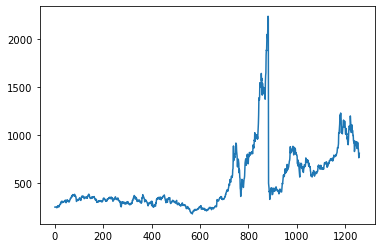

In [7]:
plt.plot(df1)

LSTM is sensitive to scale of data, we are using MinMax scalar

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler(feature_range=(0,1))
df1= scalar.fit_transform(np.array(df1).reshape(-1,1))

print(df1)
df1.shape


[[0.03447941]
 [0.03449398]
 [0.0347173 ]
 ...
 [0.2840449 ]
 [0.3018769 ]
 [0.30629485]]


(1259, 1)

# Training and Testing
first split the dataset

In [10]:
training_size= int(len(df1)*0.65)
test_size= len(df1)- training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [11]:
training_size, test_size

(818, 441)

In [12]:
len(train_data), len(test_data)

(818, 441)

Assigning time-steps so as to know how many past days dta to be considered for presiction


In [13]:
#Convert an array of values into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)- time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4

time_step =100
x_train, y_train= create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [15]:
x_train.shape, y_train.shape

((717, 100), (717,))

In [16]:
x_test.shape, y_test.shape

((340, 100), (340,))

reshaping input to be [sample, timesteps, features] which wil be used as LSTM

In [17]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential as sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Creating a stacked LSTM model

In [19]:
model= sequential()
model.add(LSTM(50,return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0050 - val_loss: 0.0203
Epoch 2/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 3/100
12/12 [==============================] - 1s 105ms/step - loss: 9.0575e-04 - val_loss: 0.0017
Epoch 4/100
12/12 [==============================] - 1s 107ms/step - loss: 7.7107e-04 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 1s 106ms/step - loss: 6.7565e-04 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 5.8523e-04 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 1s 109ms/step - loss: 5.2697e-04 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 4.4707e-04 - val_loss: 0.0011
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 3.9505e-04 - val_loss: 0.0010
Epoch 10/100
12/12 [==============================] - 1s 116ms/

12/12 [==============================] - 1s 110ms/step - loss: 2.1419e-04 - val_loss: 0.0030
Epoch 79/100
12/12 [==============================] - 1s 109ms/step - loss: 2.0342e-04 - val_loss: 0.0031
Epoch 80/100
12/12 [==============================] - 1s 107ms/step - loss: 2.1141e-04 - val_loss: 0.0043
Epoch 81/100
12/12 [==============================] - 1s 111ms/step - loss: 2.0212e-04 - val_loss: 0.0022
Epoch 82/100
12/12 [==============================] - 1s 111ms/step - loss: 1.9979e-04 - val_loss: 0.0040
Epoch 83/100
12/12 [==============================] - 1s 107ms/step - loss: 1.9625e-04 - val_loss: 0.0030
Epoch 84/100
12/12 [==============================] - 1s 107ms/step - loss: 2.3696e-04 - val_loss: 0.0019
Epoch 85/100
12/12 [==============================] - 1s 106ms/step - loss: 2.1450e-04 - val_loss: 0.0061
Epoch 86/100
12/12 [==============================] - 1s 107ms/step - loss: 2.1566e-04 - val_loss: 0.0028
Epoch 87/100
12/12 [==============================] - 1s 10

# Prediction model

In [22]:
#prediction and checking performance metrices

train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

In [23]:
#transform back to original form

train_predict= scalar.inverse_transform(train_predict)
test_predict= scalar.inverse_transform(test_predict)

In [24]:
#calculating RSME(root squared mean) performance metrics

import math
from sklearn.metrics import mean_squared_error


In [25]:
#train data RMSE

math.sqrt(mean_squared_error(y_train, train_predict))

380.2124447028661

In [26]:
#test data RMSE


math.sqrt(mean_squared_error(y_test, test_predict))

701.5696377340215

# Plotting

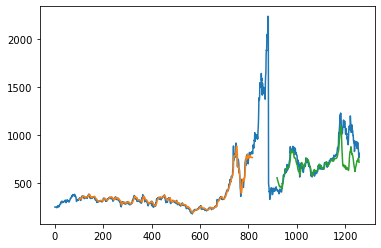

In [27]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.2920797366709066,
 0.2931283923525813,
 0.29840080008544595,
 0.2944586315043354,
 0.29759003388711414,
 0.30428006874520575,
 0.306882288399732,
 0.31039722688830845,
 0.32239365369117085,
 0.3355406888114264,
 0.33270543456097246,
 0.33344823233549203,
 0.34713901484624565,
 0.35475147831321785,
 0.41067007156104035,
 0.407548378953092,
 0.41698142520074943,
 0.4360028740933497,
 0.4539465379797841,
 0.4998689180397905,
 0.4821048849877171,
 0.5024274437075803,
 0.5102195380089135,
 0.5064230160502576,
 0.4777063569895813,
 0.41000980687257854,
 0.43158978143296856,
 0.4294342114206371,
 0.4148258551884182,
 0.40510151569585096,
 0.4251716202701259,
 0.44181417432929726,
 0.4453922263542708,
 0.46514190835914504,
 0.47475944032857864,
 0.4515336589344492,
 0.45491751546281634,
 0.4383720591519482,
 0.4651079241472389,
 0.4688801716688189,
 0.4447222518909786,
 0.43967316897921127,
 0.40586858790744634,
 0.4029750750080105,
 0.42372486382040797,
 0.43208012506189974,
 0.40044567866

In [31]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.25426736]
101
1 day input [0.29312839 0.2984008  0.29445863 0.29759003 0.30428007 0.30688229
 0.31039723 0.32239365 0.33554069 0.33270543 0.33344823 0.34713901
 0.35475148 0.41067007 0.40754838 0.41698143 0.43600287 0.45394654
 0.49986892 0.48210488 0.50242744 0.51021954 0.50642302 0.47770636
 0.41000981 0.43158978 0.42943421 0.41482586 0.40510152 0.42517162
 0.44181417 0.44539223 0.46514191 0.47475944 0.45153366 0.45491752
 0.43837206 0.46510792 0.46888017 0.44472225 0.43967317 0.40586859
 0.40297508 0.42372486 0.43208013 0.40044568 0.40686869 0.38229325
 0.37845789 0.38694424 0.3631213  0.36586432 0.35002282 0.36875783
 0.40290711 0.43112857 0.44420763 0.44155201 0.4404451  0.4327501
 0.42616687 0.49559176 0.47122508 0.44138209 0.43001194 0.4116896
 0.42681743 0.4298663  0.45016944 0.41392285 0.42268592 0.41341308
 0.39648895 0.39678995 0.3713649  0.36461661 0.35898494 0.36821408
 0.3156308  0.32400548 0.36787909 0.36522347 0.35279981 0.34575052
 0.36137354 0.35361543 0.3607327  0

9 day input [0.33554069 0.33270543 0.33344823 0.34713901 0.35475148 0.41067007
 0.40754838 0.41698143 0.43600287 0.45394654 0.49986892 0.48210488
 0.50242744 0.51021954 0.50642302 0.47770636 0.41000981 0.43158978
 0.42943421 0.41482586 0.40510152 0.42517162 0.44181417 0.44539223
 0.46514191 0.47475944 0.45153366 0.45491752 0.43837206 0.46510792
 0.46888017 0.44472225 0.43967317 0.40586859 0.40297508 0.42372486
 0.43208013 0.40044568 0.40686869 0.38229325 0.37845789 0.38694424
 0.3631213  0.36586432 0.35002282 0.36875783 0.40290711 0.43112857
 0.44420763 0.44155201 0.4404451  0.4327501  0.42616687 0.49559176
 0.47122508 0.44138209 0.43001194 0.4116896  0.42681743 0.4298663
 0.45016944 0.41392285 0.42268592 0.41341308 0.39648895 0.39678995
 0.3713649  0.36461661 0.35898494 0.36821408 0.3156308  0.32400548
 0.36787909 0.36522347 0.35279981 0.34575052 0.36137354 0.35361543
 0.3607327  0.36558759 0.35226092 0.3306324  0.3382837  0.36094146
 0.36140753 0.33857014 0.32916622 0.31195565 0.2840

16 day output [[0.23295891]]
17 day input [0.43600287 0.45394654 0.49986892 0.48210488 0.50242744 0.51021954
 0.50642302 0.47770636 0.41000981 0.43158978 0.42943421 0.41482586
 0.40510152 0.42517162 0.44181417 0.44539223 0.46514191 0.47475944
 0.45153366 0.45491752 0.43837206 0.46510792 0.46888017 0.44472225
 0.43967317 0.40586859 0.40297508 0.42372486 0.43208013 0.40044568
 0.40686869 0.38229325 0.37845789 0.38694424 0.3631213  0.36586432
 0.35002282 0.36875783 0.40290711 0.43112857 0.44420763 0.44155201
 0.4404451  0.4327501  0.42616687 0.49559176 0.47122508 0.44138209
 0.43001194 0.4116896  0.42681743 0.4298663  0.45016944 0.41392285
 0.42268592 0.41341308 0.39648895 0.39678995 0.3713649  0.36461661
 0.35898494 0.36821408 0.3156308  0.32400548 0.36787909 0.36522347
 0.35279981 0.34575052 0.36137354 0.35361543 0.3607327  0.36558759
 0.35226092 0.3306324  0.3382837  0.36094146 0.36140753 0.33857014
 0.32916622 0.31195565 0.2840449  0.3018769  0.30629485 0.25426736
 0.24520254 0.233625

24 day output [[0.3244486]]
25 day input [0.41000981 0.43158978 0.42943421 0.41482586 0.40510152 0.42517162
 0.44181417 0.44539223 0.46514191 0.47475944 0.45153366 0.45491752
 0.43837206 0.46510792 0.46888017 0.44472225 0.43967317 0.40586859
 0.40297508 0.42372486 0.43208013 0.40044568 0.40686869 0.38229325
 0.37845789 0.38694424 0.3631213  0.36586432 0.35002282 0.36875783
 0.40290711 0.43112857 0.44420763 0.44155201 0.4404451  0.4327501
 0.42616687 0.49559176 0.47122508 0.44138209 0.43001194 0.4116896
 0.42681743 0.4298663  0.45016944 0.41392285 0.42268592 0.41341308
 0.39648895 0.39678995 0.3713649  0.36461661 0.35898494 0.36821408
 0.3156308  0.32400548 0.36787909 0.36522347 0.35279981 0.34575052
 0.36137354 0.35361543 0.3607327  0.36558759 0.35226092 0.3306324
 0.3382837  0.36094146 0.36140753 0.33857014 0.32916622 0.31195565
 0.2840449  0.3018769  0.30629485 0.25426736 0.24520254 0.23362553
 0.22239888 0.21269879 0.20490655 0.19910923 0.19528899 0.19338256
 0.19329828 0.19492328 0

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1259

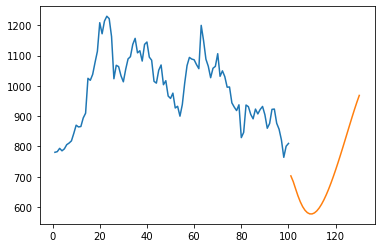

In [33]:
plt.plot(day_new,scalar.inverse_transform(df1[1159:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

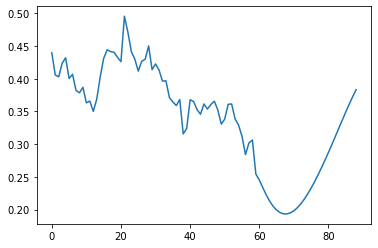

In [34]:
#combining df1 to the lst output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

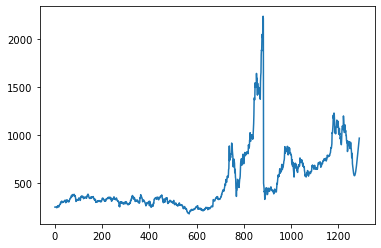

In [35]:
df3=scalar.inverse_transform(df3).tolist()
plt.plot(df3)
